In [1]:
import tqdm
import json
import pickle
import random
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

import xgboost as xgb
from zeo_amd.classify import get_metrics, get_datasets, train_classifier
from zeo_amd.plotting import savefig

plt.style.use("jupyter")

In [2]:
LABELS = ['Al', 'B', 'Be', 'Ca', 'Co', 'F', 'Ga', 'Ge', 'K', 'Mg', 'Na', 'P', 'Si', 'Zn']

## Metrics for a balanced classifier

In [3]:
df = pd.read_json("../data/hparams_rnd_balanced.json")

df["params_str"] = df["params"].apply(json.dumps)

BEST_HYPERPARAMS = '{"colsample_bytree": 0.5, "learning_rate": 0.1, "max_depth": 6, "min_child_weight": 1, "n_estimators": 200, "subsample": 0.5}'

df = df.loc[
    (df["classifier"] == "XGBClassifier")
    & (df["params_str"] == BEST_HYPERPARAMS)
]

df = df.drop(["classifier", "params", "params_index", "params_str"], axis=1)

idx = df.groupby("label").idxmin(numeric_only=True)["val_roc_auc"]
best = df.loc[idx]

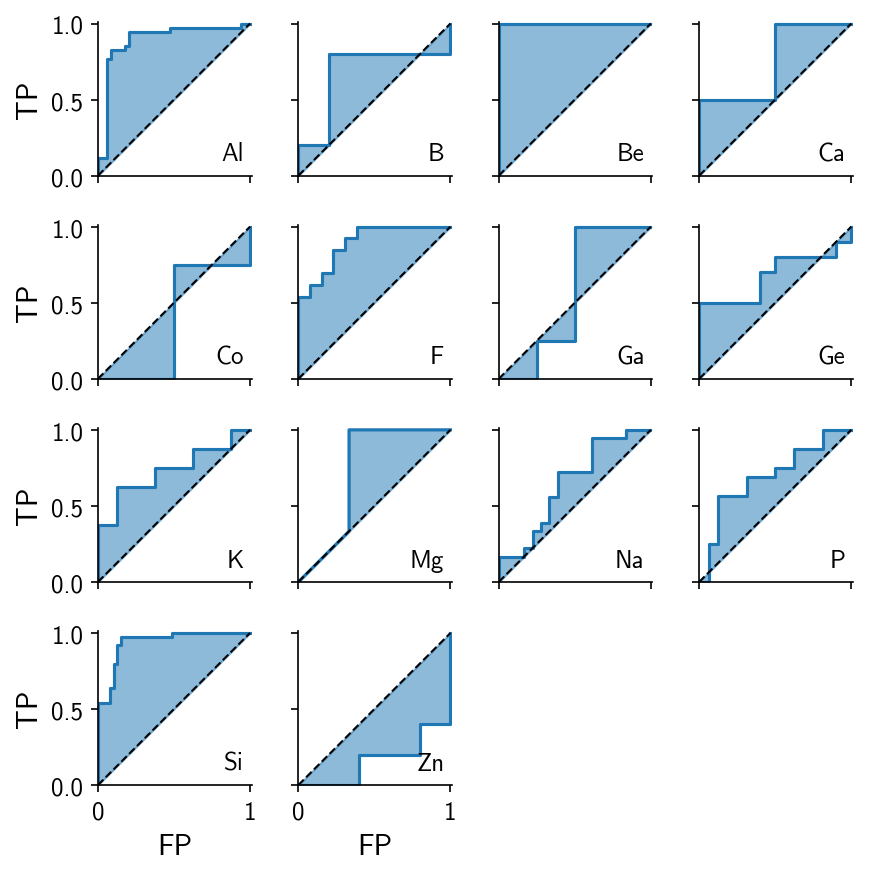

In [4]:
LX, LY = 1.5, 1.5
fig, ax_fig = plt.subplots(4, 4, figsize=(4 * LX, 4 * LY), sharex=True, sharey=True)

_c = cm.tab10(0)
for ax, label in zip(ax_fig.reshape(-1), LABELS):
    _df = best.loc[df.label == label]
    
    _x = _df["test_fpr"].item()
    _y = _df["test_tpr"].item()
    
    ax.plot(_x, _y, color=_c)
    ax.plot(_x, _x, linestyle="--", color="k", linewidth=1)
    ax.fill_between(
        _x,
        _y,
        _x,
        alpha=0.5,
        interpolate=True,
        color=_c
    )

    ax.set_xlim(0, 1.01)
    ax.set_ylim(0, 1.01)
    ax.annotate(label, (0.95, 0.1), xycoords="axes fraction", ha='right')

    ax.set_aspect("equal")

for ax in ax_fig[-1, :]:
    ax.set_xlabel("FP")

for ax in ax_fig[:, 0]:
    ax.set_ylabel("TP")
    
for ax in ax_fig.reshape(-1)[-2:]:
    ax.axis("off")
    
fig.tight_layout()
savefig(fig, "04-xgboost-balanced-roc.pdf")
plt.show()

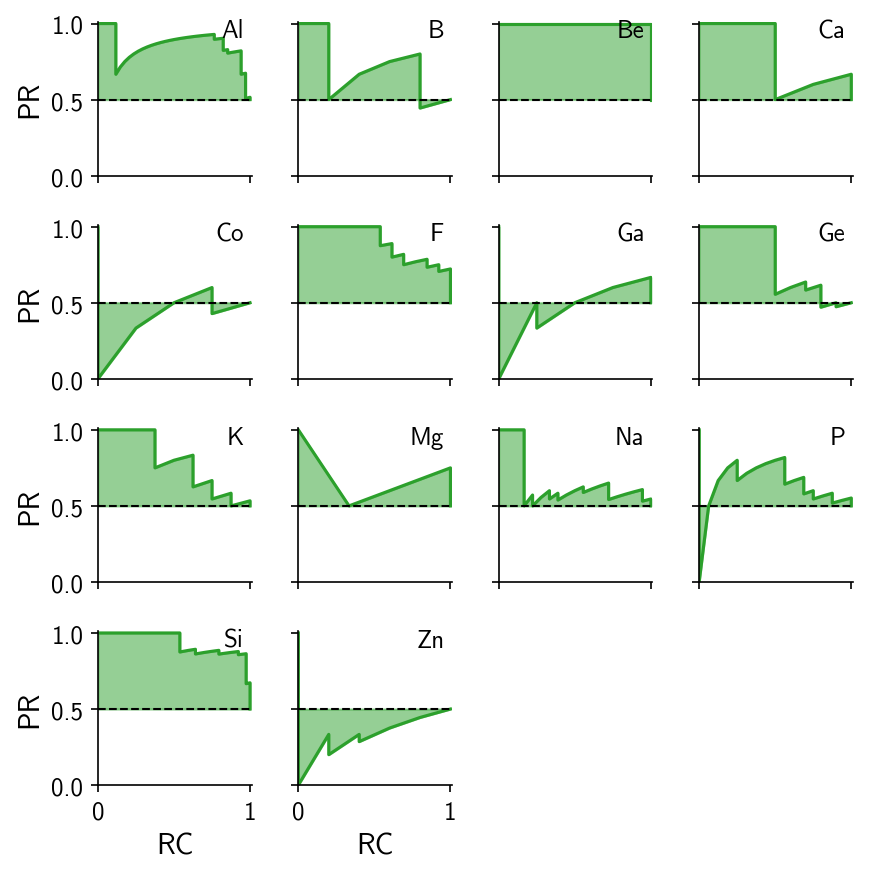

In [5]:
LX, LY = 1.5, 1.5
fig, ax_fig = plt.subplots(4, 4, figsize=(4 * LX, 4 * LY), sharex=True, sharey=True)

_c = cm.tab10(2)
for ax, label in zip(ax_fig.reshape(-1), LABELS):
    _df = best.loc[best.label == label]
    
    _x = _df["test_rc"].item()
    _y = _df["test_pr"].item()
    
    baseline = _df["n_pos"] / (_df["n_pos"] + _df["n_neg"])
    
    ax.plot(_x, _y, color=_c)
    ax.plot([0, 1], [baseline, baseline], linestyle="--", color="k", linewidth=1)
    ax.fill_between(
        _x,
        _y,
        baseline,
        alpha=0.5,
        interpolate=True,
        color=_c
    )

    ax.set_xlim(0, 1.01)
    ax.set_ylim(0, 1.01)
    ax.annotate(label, (0.95, 0.9), xycoords="axes fraction", ha='right')

    ax.set_aspect("equal")

for ax in ax_fig[-1, :]:
    ax.set_xlabel("RC")

for ax in ax_fig[:, 0]:
    ax.set_ylabel("PR")
    
for ax in ax_fig.reshape(-1)[-2:]:
    ax.axis("off")
    
fig.tight_layout()
savefig(fig, "04-xgboost-balanced-pr.pdf")
plt.show()

## Metrics for an unbalanced classifier

In [6]:
df = pd.read_json("../data/hparams_rnd_unbalanced.json")

df["params_str"] = df["params"].apply(json.dumps)

BEST_HYPERPARAMS = '{"colsample_bytree": 0.5, "learning_rate": 0.1, "max_depth": 6, "min_child_weight": 1, "n_estimators": 200, "subsample": 0.5}'

df = df.loc[
    (df["classifier"] == "XGBClassifier")
    & (df["params_str"] == BEST_HYPERPARAMS)
]

df = df.drop(["classifier", "params", "params_index", "params_str"], axis=1)

idx = df.groupby("label").idxmin(numeric_only=True)["val_roc_auc"]
best = df.loc[idx]

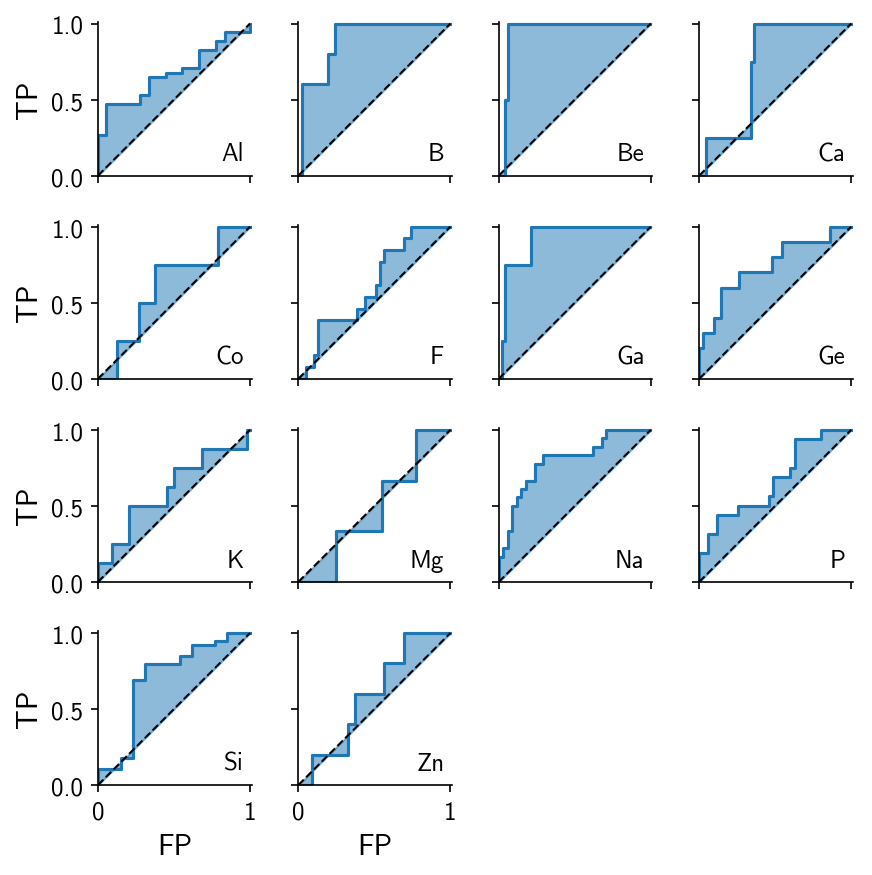

In [7]:
LX, LY = 1.5, 1.5
fig, ax_fig = plt.subplots(4, 4, figsize=(4 * LX, 4 * LY), sharex=True, sharey=True)

_c = cm.tab10(0)
for ax, label in zip(ax_fig.reshape(-1), LABELS):
    _df = best.loc[df.label == label]
    
    _x = _df["test_fpr"].item()
    _y = _df["test_tpr"].item()
    
    ax.plot(_x, _y, color=_c)
    ax.plot(_x, _x, linestyle="--", color="k", linewidth=1)
    ax.fill_between(
        _x,
        _y,
        _x,
        alpha=0.5,
        interpolate=True,
        color=_c,
    )

    ax.set_xlim(0, 1.01)
    ax.set_ylim(0, 1.01)
    ax.annotate(label, (0.95, 0.1), xycoords="axes fraction", ha='right')

    ax.set_aspect("equal")

for ax in ax_fig[-1, :]:
    ax.set_xlabel("FP")

for ax in ax_fig[:, 0]:
    ax.set_ylabel("TP")
    
for ax in ax_fig.reshape(-1)[-2:]:
    ax.axis("off")
    
fig.tight_layout()
savefig(fig, "04-xgboost-unbalanced-roc.pdf")
plt.show()

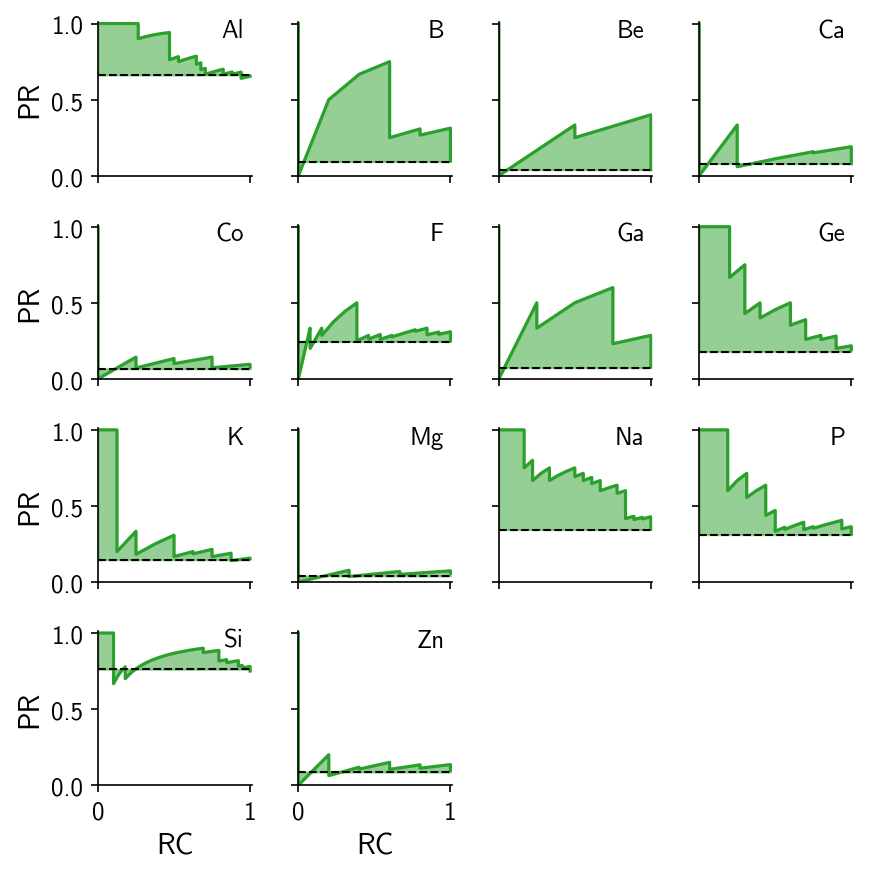

In [8]:
LX, LY = 1.5, 1.5
fig, ax_fig = plt.subplots(4, 4, figsize=(4 * LX, 4 * LY), sharex=True, sharey=True)

_c = cm.tab10(2)
for ax, label in zip(ax_fig.reshape(-1), LABELS):
    _df = best.loc[best.label == label]
    
    _x = _df["test_rc"].item()
    _y = _df["test_pr"].item()
    
    baseline = _df["n_pos"] / (_df["n_pos"] + _df["n_neg"])
    
    ax.plot(_x, _y, color=_c)
    ax.plot([0, 1], [baseline, baseline], linestyle="--", color="k", linewidth=1)
    ax.fill_between(
        _x,
        _y,
        baseline,
        alpha=0.5,
        interpolate=True,
        color=_c,
    )

    ax.set_xlim(0, 1.01)
    ax.set_ylim(0, 1.01)
    ax.annotate(label, (0.95, 0.9), xycoords="axes fraction", ha='right')

    ax.set_aspect("equal")

for ax in ax_fig[-1, :]:
    ax.set_xlabel("RC")

for ax in ax_fig[:, 0]:
    ax.set_ylabel("PR")
    
for ax in ax_fig.reshape(-1)[-2:]:
    ax.axis("off")
    
fig.tight_layout()
savefig(fig, "04-xgboost-unbalanced-pr.pdf")
plt.show()